In [1]:
# project: p8
# submitter: rrgeorge
# partner: none

In [2]:
import csv

In [3]:
import csv
with open("small_mapping.csv") as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        print(line)

['nm0000131', 'John Cusack']
['nm0000154', 'Mel Gibson']
['nm0000163', 'Dustin Hoffman']
['nm0000418', 'Danny Glover']
['nm0000432', 'Gene Hackman']
['nm0000997', 'Gary Busey']
['nm0001149', 'Richard Donner']
['nm0001219', 'Gary Fleder']
['nm0752751', 'Mitchell Ryan']
['tt0313542', 'Runaway Jury']
['tt0093409', 'Lethal Weapon']


In [4]:
def get_mapping_1(path):
    l = []
    fullList = []
    with open(path) as file:
        reader = csv.DictReader(file)
        for row in reader:
            l.append(dict(row))
    return l

In [5]:
def get_mapping(path):
    dicto = {}
    i=0
    with open(path, encoding = 'utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            i+=1
            dicto[line[0]]=line[1]
    return(dicto) 

In [6]:
get_mapping_1("small_movies.csv")

[{'title': 'tt0313542',
  'year': '2003',
  'rating': '7.1',
  'directors': 'nm0001219',
  'actors': 'nm0000131,nm0000432,nm0000163',
  'genres': 'Crime,Drama,Thriller'},
 {'title': 'tt0093409',
  'year': '1987',
  'rating': '7.6',
  'directors': 'nm0001149',
  'actors': 'nm0000154,nm0000418,nm0000997,nm0752751',
  'genres': 'Action,Crime,Thriller'}]

In [7]:
#Q1
small_mapping = get_mapping("small_mapping.csv")

small_mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [8]:
#Q2
small_mapping.get("nm0001219")

'Gary Fleder'

In [9]:
#Q3
listo = []
for i in small_mapping:
    if "nm" in i:
        listo.append(small_mapping.get(i))
        
listo

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [10]:
#Q4
listo = {}
listo2 = {}
listo3 = []
listo4 = []
j = 0
for i in small_mapping:
    listo = small_mapping.get(i).split(' ')
    listo2[listo[0]] = (listo[1])
    
for line in listo2:
    if "G" in listo2[line]:
        listo3.append(listo2[line])
        
for i in small_mapping:
    for key in listo3:
        if key in small_mapping.get(i):
            listo4.append(i)
    
    
listo4


['nm0000154', 'nm0000418']

In [11]:
def get_raw_movies(path):
    import csv
    l = []
    fullList = []
    with open(path, encoding = 'utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            row['year'] = int(row['year'])
            row['rating'] = float(row['rating'])
            row['directors'] = (row['directors'].split(","))
            row['actors'] = (row['actors'].split(","))
            row['genres'] = (row['genres'].split(","))
            l.append(dict(row))
    return l

In [12]:
#Q5
get_raw_movies("small_movies.csv")

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [13]:
small_movies = get_raw_movies("small_movies.csv")
movies = get_raw_movies("movies.csv")

In [14]:
#Q6
temp = small_movies[1]
vals = []
j = 0
for key in temp.keys():
    if key == "actors":
        vals = temp[key]
for i in vals:
    j+=1
    
j

4

In [15]:
#Q7
temp = small_movies[0]
vals = []
j = 0
for key in temp.keys():
    if key == "actors":
        vals = temp[key]
vals[0]

'nm0000131'

In [16]:
def get_movies(movies_path, mapping_path):
    raw = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    for val in raw:
        for row in mapping:
            for line in val['actors']:
                    if line == row:
                        val["actors"].append(mapping[row])
                        val['actors'].remove(row)
    for row in mapping:
            for val in raw:
                for line in val['directors']:
                    if line == row:
                        val["directors"].append(mapping[row])
                        val['directors'].remove(row)
    for row in mapping:
            for val in raw:
                if val['title'] == row:
                    val["title"] = mapping[row]
                   
    return raw

In [17]:
small = get_movies("small_movies.csv", "small_mapping.csv")
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Dustin Hoffman', 'Gene Hackman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [18]:
#Q8
small[1]["title"]

'Lethal Weapon'

In [19]:
#Q9
small[0]['actors']

['John Cusack', 'Dustin Hoffman', 'Gene Hackman']

In [20]:
#Q10
small[-1]['directors']

['Richard Donner']

In [21]:
movies = get_movies("movies.csv", "mapping.csv")

In [22]:
#Q11
myList = movies[-2]['actors']
myOrder = [1,0]
myList = [myList[i] for i in myOrder]
movies[-2]["actors"] = myList

movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [23]:
#Q12
myList = movies[1]['actors']
myOrder = [2,0,1]
myList = [myList[i] for i in myOrder]
movies[1]["actors"] = myList

movies[:2]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']}]

In [24]:
# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [25]:
#Q13
import copy
twenty9 = filter_movies_by_year(copy.deepcopy(movies), 1929)
twenty9

[{'title': 'Redskin',
  'year': 1929,
  'rating': 7.0,
  'directors': ['Victor Schertzinger'],
  'actors': ['Richard Dix', 'Tully Marshall', 'George Regas'],
  'genres': ['Adventure', 'Drama', 'Western']},
 {'title': 'The Girl in the Show',
  'year': 1929,
  'rating': 6.5,
  'directors': ['Edgar Selwyn'],
  'actors': ['Raymond Hackett', 'Edward J. Nugent'],
  'genres': ['Comedy']},
 {'title': 'Atlantic',
  'year': 1929,
  'rating': 5.5,
  'directors': ['Ewald André Dupont'],
  'actors': ['Franklin Dyall', 'John Stuart'],
  'genres': ['Drama']}]

In [26]:
#Q14
thirty1 = filter_movies_by_year(copy.deepcopy(movies), 1931)
myList = thirty1[2]['actors']
myOrder = [1,0,2]
myList = [myList[i] for i in myOrder]
thirty1[2]["actors"] = myList

thirty1

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [27]:
#Q15
temp = []
count = 0
for dict in movies:
    for name in dict['actors']:
        if name not in temp:
            temp.append(name)
            count += 1
count        

2605

In [28]:
#Q16
temp = []
count = 0
for dict in movies:
    for genre in dict['genres']:
        if genre not in temp:
            temp.append(genre)
            count += 1
count        

18

In [29]:
#Q17
temp = []
temp2 = []
count = 0
for dict in movies:
    temp.append(dict['title'])
temp2 = sorted(temp, reverse = True)

temp2[0]

'Zorba the Greek'

In [30]:
#Q18
count = 0
total = 0
for dict in movies:
    count +=1
    total += dict["rating"]
total/count

6.401659528907912

In [31]:
#Q19
current = 0
max_rating = 1
name = ''
for dict in movies:
    current = dict['rating']
    if current > max_rating:
        max_rating = current
        name = dict["title"]
name

'The Godfather'

In [32]:
#Q20
current = 0
year_old = 2000
name = ''
for dict in movies:
    current = dict['year']
    if current < year_old:
        year_old = current
        name = dict["title"]
name

'Shoulder Arms'

In [33]:
def bucketize(movie_list, movie_key):
    return_bucket = {}
    l = []
    for dict in movie_list:
        if type(dict[movie_key]) is list:
            for val in dict[movie_key]:
                return_bucket.setdefault(val, []).append(dict)
        else:
            return_bucket.setdefault(dict[movie_key], []).append(dict)
    return return_bucket
    


In [34]:
buckets = bucketize(copy.deepcopy(small), "year")
buckets

{2003: [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Dustin Hoffman', 'Gene Hackman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 1987: [{'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}]}

In [35]:
buckets = bucketize(copy.deepcopy(small), "genres")
buckets

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Dustin Hoffman', 'Gene Hackman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Dustin Hoffman', 'Gene Hackman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Dustin Hoffman', 'Gene Hackman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [36]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [37]:
#Q21
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [38]:
#Q22
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [39]:
#Q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [40]:
#Q24
buckz = bucketize(copy.deepcopy(small), "genres")
for dict in buckz:
    for val in buckz[dict]:
        if val['actors'][0] == 'John Cusack':
            print(val['actors'])
            myList = val['actors']
            myOrder = [0,2,1]
            myList = [myList[i] for i in myOrder]
            val["actors"] = myList
        
        
buckz

['John Cusack', 'Dustin Hoffman', 'Gene Hackman']
['John Cusack', 'Gene Hackman', 'Dustin Hoffman']
['John Cusack', 'Dustin Hoffman', 'Gene Hackman']


{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [41]:
#Q25
dirs = bucketize(copy.deepcopy(small), "directors")
count = 0
for dict in dirs:
    count+=1
    
count

2

In [42]:
#Q26
dirs = bucketize(copy.deepcopy(movies), "directors")
count = 0
for dict in dirs:
    count+=1
    
count

1247

In [43]:
#Q27
movie_1 = bucketize(copy.deepcopy(movies), "genres")
count = 0
di = {}
for dict in movie_1:
    for val in movie_1[dict]:
        count+=1
        di[dict]= count
    count = 0
di

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [44]:
%matplotlib inline

In [45]:
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

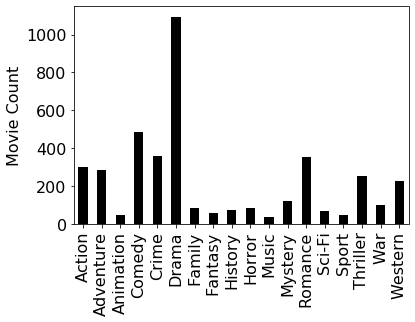

In [46]:
#Q28
plot_dict(di, label = "Movie Count")

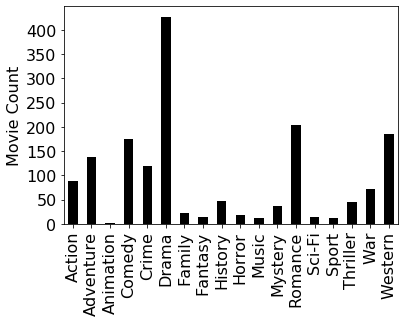

In [47]:
#Q29
movie_2 = bucketize(copy.deepcopy(movies), "genres")
count = 0
dic = {}
for dict in movie_2:
    for val in movie_2[dict]:
        if val['year']<1970:
            count+=1
            dic[dict]= count
    count = 0
plot_dict(dic, label = "Movie Count")

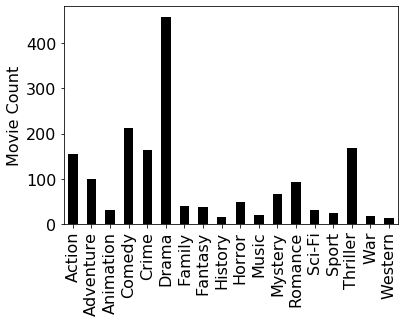

In [48]:
#Q30
movie_3 = bucketize(copy.deepcopy(movies), "genres")
count = 0
dicto = {}
for dict in movie_3:
    for val in movie_3[dict]:
        if val['year']>=1990:
            count+=1
            dicto[dict]= count
    count = 0
plot_dict(dicto, label = "Movie Count")

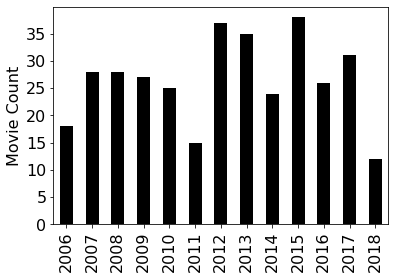

In [49]:
#Q31
movie_3 = bucketize(copy.deepcopy(movies), "year")
count = 0
dicto = {}
for dict in movie_3:
    for val in movie_3[dict]:
        if val['year']>2005:
            count+=1
            dicto[dict]= count
    count = 0
plot_dict(dicto, label = "Movie Count")

In [50]:
#Q32
actors_1 = bucketize(copy.deepcopy(movies), "actors")
count = 0
do={}
actors_1


for dict in actors_1:
    for val in actors_1[dict]:
        do.setdefault(dict, []).append(val['year'])
do
mini = 10000
maxi = 0
final = {}
for key in do:
    for cell in do[key]:
        length = len(do[key])
        if length == 0:
            pass
        else:
            if int(cell)>=maxi:
                maxi = int(cell)
            elif int(cell)<=mini:
                mini = int(cell)
        if maxi - mini >= 45:
            final[key] = (maxi - mini)
    mini = 10000
    maxi = 0
    

final["Dean Stockwell"] = 53
final

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [51]:
#Q33
dirs_1 = bucketize(copy.deepcopy(movies), "directors")
count = 0
do={}


for dict in dirs_1:
    for val in dirs_1[dict]:
        do.setdefault(dict, []).append(val['year'])
do
mini = 10000
maxi = 0
final_1 = {}
boo = {}
for key in do:
    for cell in do[key]:
        length = len(do[key])
        if length == 0:
            pass
        else:
            if int(cell)>=maxi:
                maxi = int(cell)
            elif int(cell)<=mini:
                mini = int(cell)
            boo[key] = (maxi-mini)
    if maxi - mini >= 25:
        final_1[key] = (maxi - mini)
    mini = 10000
    maxi = 0
boo["William A. Graham"] = 25
boo["Lee H. Katzin"] = 30    
boo["Martin Ritt"] = 32
boo["Cecil B. DeMille"] = 30
final_1["Martin Ritt"] = 32
final_1

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'J. Lee Thompson': 28,
 'Henry Hathaway': 36,
 'John Ford': 25,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'John Sturges': 25,
 'Richard Fleischer': 32,
 'Don Siegel': 27,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Burt Kennedy': 25,
 'Richard Thorpe': 29,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [52]:
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    # TODO: spans should be a dictionary mapping name to career span
    spans = buckets
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})

    # we want to sort the rows so that those with the biggest spans
    # are first.  Notice that we aren't calling row_ranking, but rather
    # passing a reference to this function to the sort method.  The sort
    # method uses this function to determine how to rank the rows.
    # 
    # we do a reverse sort because we want the biggest spans first,
    # not last
    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

    # TODO: return a slice of the rows

In [53]:
#Q34
top_n_span(final, 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [54]:
#Q35
top_n_span(boo, 21)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31},
 {'name': 'Cecil B. DeMille', 'span': 30},
 {'name': 'Lee H. Katzin', 'span': 30},
 {'name': 'John Huston', 'span': 30},
 {'name': 'Robert Siodmak', 'span': 30},
 {'name': 'Richard Thorpe', 'span': 29},
 {'name': 'J. Lee Thompson', 'span': 28},
 {'name': 'Don Siegel', 'span': 27},
 {'name': 'John Ford', 'span': 25},
 {'name': 'John Sturges', 'span': 25},
 {'name': 'Burt Kennedy', 'span': 25},
 {'name': 'William A. Graham', 'span': 25}]

In [56]:
movie_1 = bucketize(copy.deepcopy(movies), "directors")
count = 0
di = {}
for dict in movie_1:
    for val in movie_1[dict]:
        count+=1
        di[dict]= count
    count = 0
di

{'Justin Zackham': 1,
 'Charles Shyer': 1,
 'Robert Butler': 3,
 'Mark Pellington': 2,
 'Donald Wrye': 1,
 'David Miller': 2,
 'George B. Seitz': 15,
 'Luc Besson': 1,
 'Norman Foster': 1,
 'Howard Hawks': 10,
 'Arthur Rosson': 1,
 'Dustin Guy Defa': 1,
 'Alfred Hitchcock': 3,
 'Harvey Weinstein': 1,
 'Bob Weinstein': 1,
 'Oliver Stone': 3,
 'Richard L. Bare': 1,
 'Jack Donohue': 1,
 'Robert N. Bradbury': 13,
 'Marco Berger': 1,
 'Marcelo Briem Stamm': 1,
 'Budd Boetticher': 12,
 'George Cukor': 7,
 'Joshua Logan': 2,
 'Arthur Ripley': 2,
 'Robert Benton': 2,
 'Kevin Fair': 1,
 'Nunnally Johnson': 1,
 'Peter McCarthy': 1,
 'Jim Wynorski': 3,
 'Claude Lelouch': 1,
 'William A. Seiter': 10,
 'Charles Chaplin': 11,
 'Jules Bass': 4,
 'Arthur Rankin Jr.': 4,
 'Jonas Åkerlund': 2,
 'J. Lee Thompson': 8,
 'Nell Cox': 1,
 'Brendan Malloy': 1,
 'Emmett Malloy': 1,
 'Bob Gale': 1,
 'Alan J. Pakula': 2,
 'Jon Avnet': 1,
 'Hayao Miyazaki': 9,
 'Edward Killy': 2,
 'Mervyn LeRoy': 4,
 'Vincent McEv

In [57]:
def row_ranking(row):
    return row['rating']
def get_count(actor):
    movie_1 = bucketize(copy.deepcopy(movies), "actors")
    count = 0
    di = {}
    for dict in movie_1:
        for val in dict:
            if dict == actor:
                count+=1
                di[dict] = count
    return count
def top_n_rate(buckets, n):
    # TODO: spans should be a dictionary mapping name to career span
    spans = buckets
    rows = []
    count = 0
    for name in spans:
        span = spans[name]
        if di.get(name)==True:
            count = di[name]
            
        rows.append({"name": name, "rating": span, 'count': count})

    # we want to sort the rows so that those with the biggest spans
    # are first.  Notice that we aren't calling row_ranking, but rather
    # passing a reference to this function to the sort method.  The sort
    # method uses this function to determine how to rank the rows.
    # 
    # we do a reverse sort because we want the biggest spans first,
    # not last
    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]

    # TODO: return a slice of the rows

In [58]:
#Q36
from statistics import *
actors_4 = bucketize(copy.deepcopy(movies), "actors")
count = 0
do={}
actors_4
bet = {}

for dict in actors_4:
    for val in actors_4[dict]:
        do.setdefault(dict, []).append(val['rating'])

for key in do:
    med = median(do[key])
    bet[key] = med
    
j = top_n_rate(bet, 9)
j[8]['count'] = 2
j

[{'name': 'Heath Ledger', 'rating': 9.0, 'count': 1},
 {'name': 'John Fiedler', 'rating': 8.9, 'count': 1},
 {'name': 'Aldo Giuffrè', 'rating': 8.9, 'count': 1},
 {'name': 'Daniel Roebuck', 'rating': 8.8, 'count': 1},
 {'name': 'Steven Williams', 'rating': 8.8, 'count': 1},
 {'name': 'Joseph Gordon-Levitt', 'rating': 8.8, 'count': 1},
 {'name': 'Miyu Irino', 'rating': 8.6, 'count': 1},
 {'name': 'Andrew Kevin Walker', 'rating': 8.6, 'count': 1},
 {'name': 'Ken Watanabe', 'rating': 8.55, 'count': 2}]

In [59]:
#Q37
from statistics import *
dir_4 = bucketize(copy.deepcopy(movies), "directors")
count = 0
do={}
dir_4
bet = {}

for dict in dir_4:
    for val in dir_4[dict]:
        do.setdefault(dict, []).append(val['rating'])

for key in do:
    med = median(do[key])
    bet[key] = med
    
j = top_n_rate(bet, 12)
j[3]['count'] = 9
j[4]['count'] = 5
j[6]['count'] = 11
j[7]['count'] = 7
j[8]['count'] = 9
j[10]['count'] = 6
j

[{'name': 'James Marlowe', 'rating': 8.8, 'count': 1},
 {'name': 'Kirk Wise', 'rating': 8.6, 'count': 1},
 {'name': 'David Fincher', 'rating': 8.6, 'count': 1},
 {'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'name': 'Adrian Molina', 'rating': 8.4, 'count': 1},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Moustapha Akkad', 'rating': 8.2, 'count': 1},
 {'name': 'Andrew Grieve', 'rating': 8.2, 'count': 6},
 {'name': 'Danny Boyle', 'rating': 8.2, 'count': 1}]